<a href="https://colab.research.google.com/github/aabdulhakeem/MINIST_dif_models_study/blob/main/MINIST_with_different_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the libraries

In [30]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import random
import time
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

##0. Importing MINIST with shuffled data

In [31]:
X, y = sklearn.datasets.fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X.shape

(70000, 784)

In [32]:
X = X.reshape(-1, 28, 28)

In [33]:
X_images, y = sklearn.utils.shuffle(X, y, random_state=42)
X = X_images.reshape(-1, 784)

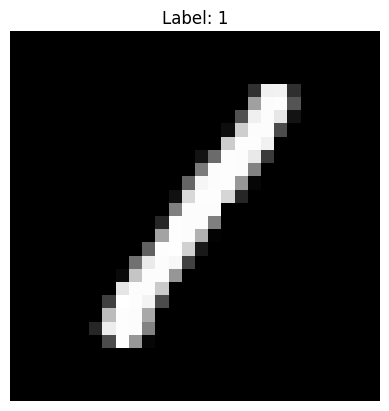

In [34]:
# choosing number of samples randomly
i = random.randint(0, len(X))
plt.imshow(X_images[i], cmap='gray')
plt.title(f"Label: {y[i]}")
plt.axis('off')
plt.show()

## 1.  SIMPLE ANN MODEL AND SVM AND APPLY THEM TO THE DATA independently

In [35]:
X_ann = X / 255.0
y_ann = to_categorical(y.astype(int), 10)

X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_ann, y_ann, test_size=0.2, random_state=50)

for epochs in [5, 10, 15, 20]:
    print(f"\nTraining model for {epochs} epochs...")

    ann_model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    ann_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    ann_model.summary()

    start_train_time = time.time()
    history = ann_model.fit(
        X_train_ann, y_train_ann,
        epochs=epochs,
        batch_size=128,
        validation_split=0.1,
        verbose=1
    )
    end_train_time = time.time()

    start_test_time = time.time()
    ann_loss, ann_acc = ann_model.evaluate(X_test_ann, y_test_ann)
    end_test_time = time.time()

    print("\nValidation Accuracy per Epoch:")
    for i in range(len(history.history['val_accuracy'])):
        print(f"Epoch {i+1}: {history.history['val_accuracy'][i]:.4f}")

    print(f"\nFinal ANN Test Accuracy: {ann_acc:.4f}")

    # Calculate average training time per epoch
    avg_train_time = (end_train_time - start_train_time) / epochs
    avg_test_time = (end_test_time - start_test_time)
    print(f"\nAverage Training Time per Epoch: {avg_train_time:.4f} seconds")
    print(f"Test Time: {avg_test_time:.4f} seconds")


Training model for 5 epochs...


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7632 - loss: 0.7836 - val_accuracy: 0.9455 - val_loss: 0.1943
Epoch 2/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9359 - loss: 0.2131 - val_accuracy: 0.9566 - val_loss: 0.1445
Epoch 3/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9520 - loss: 0.1564 - val_accuracy: 0.9675 - val_loss: 0.1152
Epoch 4/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9609 - loss: 0.1301 - val_accuracy: 0.9704 - val_loss: 0.1084
Epoch 5/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9649 - loss: 0.1111 - val_accuracy: 0.9729 - val_loss: 0.0959
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.0964

Validation Accuracy per Epoch:
Epoch 1: 0.9455
Epoch 2: 0.9566
Epoch 3: 0.9675
Epoch 4: 0.9704
Epoch 5: 0.9729

Final ANN Test Accuracy: 0.9696

Average Training Time per Epoch: 3.5730 seconds
Test Time: 1.6001 seconds

Training model for 10 epochs...


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7633 - loss: 0.7684 - val_accuracy: 0.9452 - val_loss: 0.1922
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9375 - loss: 0.2081 - val_accuracy: 0.9621 - val_loss: 0.1371
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9531 - loss: 0.1559 - val_accuracy: 0.9652 - val_loss: 0.1171
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9617 - loss: 0.1226 - val_accuracy: 0.9720 - val_loss: 0.0967
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9661 - loss: 0.1087 - val_accuracy: 0.9732 - val_loss: 0.0934
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9712 - loss: 0.0933 - val_accuracy: 0.9752 - val_loss: 0.0909
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9747 - loss: 0.0812 - val_accuracy: 0.9746 - val_loss: 0.0873
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9760 - loss: 0.0748 - val_accuracy: 

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7660 - loss: 0.7667 - val_accuracy: 0.9470 - val_loss: 0.1910
Epoch 2/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9384 - loss: 0.2083 - val_accuracy: 0.9582 - val_loss: 0.1387
Epoch 3/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9540 - loss: 0.1495 - val_accuracy: 0.9639 - val_loss: 0.1186
Epoch 4/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9617 - loss: 0.1259 - val_accuracy: 0.9709 - val_loss: 0.1023
Epoch 5/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9649 - loss: 0.1142 - val_accuracy: 0.9714 - val_loss: 0.1007
Epoch 6/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9698 - loss: 0.0976 - val_accuracy: 0.9736 - val_loss: 0.0950
Epoch 7/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9747 - loss: 0.0820 - val_accuracy: 0.9757 - val_loss: 0.0887
Epoch 8/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9750 - loss: 0.0778 - val_accuracy: 0.

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7486 - loss: 0.8080 - val_accuracy: 0.9477 - val_loss: 0.1900
Epoch 2/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9357 - loss: 0.2136 - val_accuracy: 0.9614 - val_loss: 0.1374
Epoch 3/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9558 - loss: 0.1529 - val_accuracy: 0.9677 - val_loss: 0.1160
Epoch 4/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9615 - loss: 0.1287 - val_accuracy: 0.9732 - val_loss: 0.0987
Epoch 5/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9663 - loss: 0.1082 - val_accuracy: 0.9707 - val_loss: 0.1034
Epoch 6/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9705 - loss: 0.0942 - val_accuracy: 0.9757 - val_loss: 0.0888
Epoch 7/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9757 - loss: 0.0808 - val_accuracy: 0.9754 - val_loss: 0.0874
Epoch 8/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9754 - loss: 0.0784 - val_accuracy: 0.

**Key Results**:
- **5 Epochs**: 97.19% Accuracy | 4.8261s Train Time/Epoch | 2.7354s Test Time
- **10 Epochs**: 97.37% Accuracy | 4.4655s Train Time/Epoch | 2.0763s Test Time
- **15 Epochs**: 97.68% Accuracy | 5.3001s Train Time/Epoch | 2.0949s Test Time
- **20 Epochs**: 97.74% Accuracy | 4.3112s Train Time/Epoch | 1.4609s Test Time

**Best Model**:
- **20 Epochs**: While the improvement in accuracy is marginal (from 97.68% to 97.74%), this model provides the best result with **slightly higher accuracy**.
- **Reason**: 20 epochs offers the best balance, as accuracy improvement becomes minimal after this point and low in avg time per epoch.

---

**Observations**:
- Accuracy improves as the number of epochs increases, but the gains diminish after 10 epochs.
- The best model choice should depend on balancing **accuracy** and **training time**. While 20 epochs gives the highest accuracy, and good time.

In [36]:
print("\n--- Model Summary ---")
print(f"Number of Parameters: {ann_model.count_params()}")
print(f"Layers:")
for layer in ann_model.layers:
    print(f"- {layer.__class__.__name__}: Activation = {layer.activation.__name__ if hasattr(layer, 'activation') else 'N/A'}")
print(f"Optimizer: Adam")
print(f"Learning Rate: {optimizer.learning_rate.numpy()}")
print(f"Dropout used after first Dense layer with rate = 0.3")


--- Model Summary ---
Number of Parameters: 109386
Layers:
- Dense: Activation = relu
- Dropout: Activation = N/A
- Dense: Activation = relu
- Dense: Activation = softmax
Optimizer: Adam
Learning Rate: 0.0010000000474974513
Dropout used after first Dense layer with rate = 0.3


In [37]:
X_svm, _, y_svm, _ = train_test_split(X, y, train_size=7000, stratify=y, random_state=42)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_svm, y_train_svm)

y_pred_svm = svm_model.predict(X_test_svm)
svm_acc = accuracy_score(y_test_svm, y_pred_svm)
print(f"\nSVM Test Accuracy: {svm_acc:.4f}")


SVM Test Accuracy: 0.8993


##2. Initializing CNN model

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_images, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [61]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((49000, 28, 28),
 (10500, 28, 28),
 (10500, 28, 28),
 (49000,),
 (10500,),
 (10500,))

In [62]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

In [63]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

y_train = to_categorical(y_train.astype(int), 10)
y_test = to_categorical(y_test.astype(int), 10)
y_val = to_categorical(y_val.astype(int), 10)
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / (std + 1e-7)
X_test = (X_test - mean) / (std + 1e-7)
X_val = (X_val - mean) / (std + 1e-7)

In [64]:
def build_cnn_model1():
  cnn_model = Sequential([
      layers.Input(shape=X_train.shape[1:]),

      layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
      layers.MaxPooling2D(),

      layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
      layers.MaxPooling2D(),

      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(10, activation='softmax')

  ])
  return cnn_model

##3. Trying diffrant Number of epochs

In [65]:
def print_results(model, history, avg_train_time, test_time):
  print("\n--- Model Summary ---")

  for i in range(5):
      print(f"Epoch {i+1}, Training Accuracy:{history.history['accuracy'][i]:.4f}, Validation Accuracy: {history.history['val_accuracy'][i]:.4f}")

  print(f"\nfinal Training Accuracy: {history.history['accuracy'][-1]:.4f}")
  print(f"final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
  print(f"final Test Accuracy: {cnn_acc:.4f}")

  print(f"\nNumber of Parameters: {model.count_params()}")
  print(f"Test Time: {test_time:.4f} seconds")

  print(f"\nLayers:")
  for layer in model.layers:
      print(f"- {layer.__class__.__name__}: Activation = {layer.activation.__name__ if hasattr(layer, 'activation') else 'N/A'}")
  print(f"\nOptimizer: {cnn_model.optimizer.__class__.__name__}, Learning Rate: {optimizer.learning_rate.numpy():.4f}, Momentum: {optimizer.momentum}")

In [66]:
epochs = [5, 7, 10, 12, 15, 18, 20]
acc = []
val_acc = []
test_acc = []
for epoch in epochs:
  print(f"\nTraining the model for {epoch} epochs...")
  cnn_model = build_cnn_model1()

  optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
  cnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  start_train_time = time.time()
  history = cnn_model.fit(
      X_train, y_train,
      epochs=epoch,
      batch_size=64,
      validation_data=(X_val, y_val),
      verbose=1
  )
  end_train_time = time.time()

  start_test_time = time.time()
  cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test)
  end_test_time = time.time()

  avg_train_time = (end_train_time - start_train_time) / epoch
  test_time = (end_test_time - start_test_time)

  print_results(cnn_model, history, avg_train_time, test_time)

  acc.append(history.history['accuracy'][-1])
  val_acc.append(history.history['val_accuracy'][-1])
  test_acc.append(cnn_acc)


Training the model for 5 epochs...
Epoch 1/5
766/766 ━━━━━━━━━━━━━━━━━━━━ 70s 86ms/step - accuracy: 0.8389 - loss: 0.5354 - val_accuracy: 0.9710 - val_loss: 557.3416
Epoch 2/5
766/766 ━━━━━━━━━━━━━━━━━━━━ 75s 77ms/step - accuracy: 0.9812 - loss: 0.0636 - val_accuracy: 0.9815 - val_loss: 1271.8934
Epoch 3/5
766/766 ━━━━━━━━━━━━━━━━━━━━ 55s 72ms/step - accuracy: 0.9877 - loss: 0.0393 - val_accuracy: 0.9826 - val_loss: 994.5699
Epoch 4/5
766/766 ━━━━━━━━━━━━━━━━━━━━ 86s 78ms/step - accuracy: 0.9910 - loss: 0.0280 - val_accuracy: 0.9851 - val_loss: 2116.4856
Epoch 5/5
766/766 ━━━━━━━━━━━━━━━━━━━━ 77s 72ms/step - accuracy: 0.9923 - loss: 0.0234 - val_accuracy: 0.9865 - val_loss: 2921.0134
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9870 - loss: 3990.6052

--- Model Summary ---
Epoch 1, Training Accuracy:0.9315, Validation Accuracy: 0.9710
Epoch 2, Training Accuracy:0.9819, Validation Accuracy: 0.9815
Epoch 3, Training Accuracy:0.9881, Validation Accuracy: 0.9826
Epoch 4, Traini

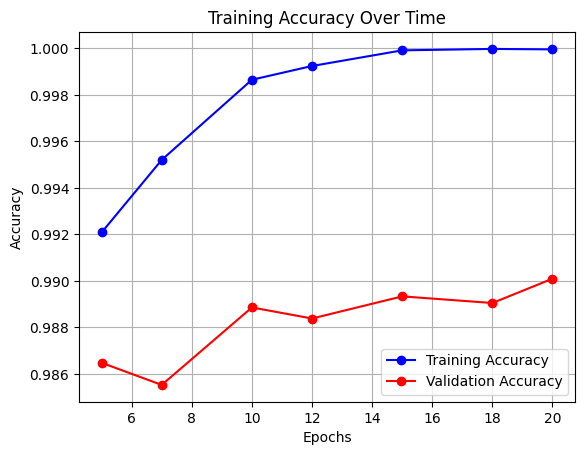

In [76]:

plt.plot(epochs, acc, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.plot(epochs, val_acc, marker='o', linestyle='-', color='r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Time')
plt.grid(True)
plt.legend()
plt.show()

In [77]:
test_acc[4]

0.9897142648696899

### **3. CNN with different Epochs Key Results**:
- **5 Epochs:** Training Accuracy: 0.9921 | Validation Accuracy: 0.9865 | Total Time: 6.1333 mins
- **7 Epochs:** Training Accuracy: 0.9952 | Validation Accuracy: 0.9855 |
Total Time: 8.4333 mins
- **10 Epochs:** Training Accuracy: 0.9987 | Validation Accuracy: 0.9889 | Total Time: 11.7833 mins
- **12 Epochs:** Training Accuracy: 0.9992 | Validation Accuracy: 0.9884 | Total Time: 14.8333 mins
- **15 Epochs:** Training Accuracy: 0.9999 | Validation Accuracy: 0.9893 | Total Time: 19.3667 mins
- **18 Epochs:** Training Accuracy: 1.0000 | Validation Accuracy: 0.9890 | Total Time: 22.8167 mins
- **20 Epochs:** Training Accuracy: 1.0000 | Validation Accuracy: 0.9901 | Total Time: 24.3667 mins

**Observations**:
1. **Diminishing Returns:** Beyond 15 epochs, validation accuracy improves by only +0.08% (98.93% → 99.01%) despite 26% longer training time.

2. **Overfitting Risk:** Training accuracy reaches 100% by 18 epochs, while validation accuracy plateaus, suggesting the model may lose generalizability.

3. **Efficiency Trade-off:** 15 epochs offer the best balance—near-peak validation accuracy (98.93%) with 20% faster training than 20 epochs.

---

**recommended Model**: 15 Epochs | Test Accuracy: 98.97%

* Why?

 * Validation accuracy (98.93%) is nearly identical to 20 epochs (99.01%).

 * Saves 5 minutes per training run (19.4 mins vs. 24.4 mins).

 * Avoids overfitting risks from longer training (100% training accuracy is a red flag).
